# 이원 분산 분석 (Two-way ANOVA) 실습 (ANOVA : Analysis Of Variance)

- 이원 분석은 두 가지 이상의 변수가 동시에 영향을 미치는 경우, 두 변수의 영향을 분리하여 분석하는 통계분석 방법이다.

# 교호작용(interaction effect) 효과 실습

- 교호작용 : 두 개 이상의 독립 변수가 종속 변수에 영향을 미칠 때, 이들 독립 변수들간의 상호작용이 종속 변수에 영향을 미치는 것

- 성별(sex)와 객실등급(Pclass)이 생존 여부(Survived)에 미치는 영향 체크

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

#load data 
titanic = sns.load_dataset('titanic')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

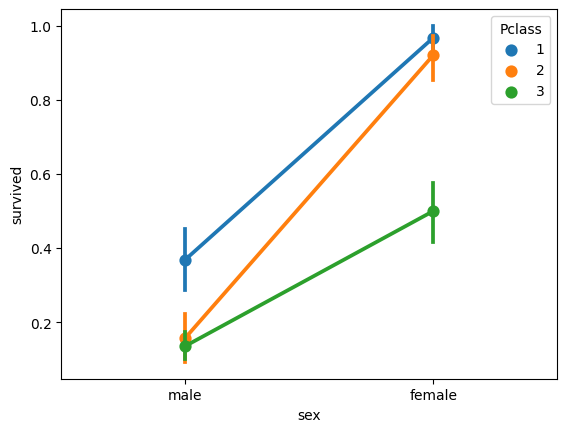

In [2]:
sns.pointplot(x='sex', y='survived', hue='pclass', data=(titanic))
plt.legend(title='Pclass', loc='best')


In [4]:
pip install statsmodels

                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 3.6 MB/s eta 0:00:03
     -                                        0.4/9.2 MB 4.9 MB/s eta 0:00:02
     --                                       0.6/9.2 MB 4.9 MB/s eta 0:00:02
     ---                                      0.8/9.2 MB 4.8 MB/s eta 0:00:02
     ----                                     1.0/9.2 MB 4.4 MB/s eta 0:00:02
     ----                                     1.1/9.2 MB 4.3 MB/s eta 0:00:02
     -----                                    1.2/9.2 MB 4.4 MB/s eta 0:00:02
     -----                                    1.3/9.2 MB 3.7 MB/s eta 0:00:03
     ------                                   1.5/9.2 MB 3.7 MB/s eta 0:00:03
     -------                                  1.7/9.2 MB 3.9 MB/s eta 0:00:02
     --------                                 1.9/9.2 MB 3.8 MB/s eta 0:00:02
     ---------                                2.2/9.2 MB 4.1 MB/s eta 0

#  이원 분산 분석 (Two-way ANOVA) 간단한 실습

- 성별(sex)와 객실등급(Pclass)이 생존 여부(Survived)에 미치는 영향 체크

In [5]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

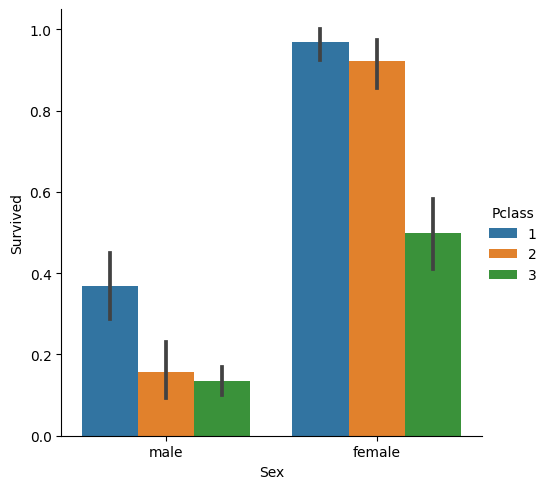

In [7]:
titanic_df = pd.read_csv("../data/Titanic_data.csv")

print(titanic_df)

# 이원 분산 분석 모델 생성 
model = ols('Survived ~ C(Sex) + C(Pclass) + C(Sex):C(Pclass)', titanic_df).fit()

# 분석 
anova_results = anova_lm(model, type=2)

# 시각화 
sns.catplot(x="Sex" , y="Survived", hue='Pclass', data=titanic_df, kind='bar')